In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn import datasets
data = datasets.load_iris()

In [ ]:
# Считайте DataFrame, используя данные функции
df = pd.DataFrame(data.data, columns=data.feature_names)
# Добавьте столбец "target" и заполните его данными.
df['target'] = data.target
# Посмотрим первые пять строк
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.isnull().sum() 

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [ ]:
# Разделение признаков
x = df.drop('target', axis=1)
y = df['target']

In [ ]:
# Построение модели
model=tree.DecisionTreeClassifier(max_depth=4, random_state=1)
model.fit(x,y)

DecisionTreeClassifier(max_depth=4, random_state=1)

[Text(0.5, 0.9, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.7, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.3, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.3, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.8461538461538461, 0.5, 'X[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(0.7692307692307693, 0.3, 'X[0] <

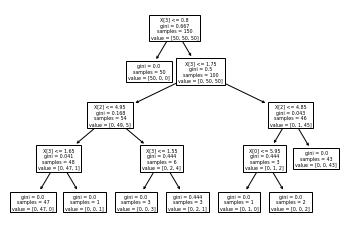

In [ ]:
# Визуализирование данных
tree.plot_tree(model)

In [ ]:
# Разделение выборки на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(
    x, y,  test_size=0.2, random_state=1)

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
y_pred = dtr.predict(x_test)

In [ ]:
print('Дерево решений')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Дерево решений
Mean Absolute Error: 0.08
Mean Squared Error: 0.08
Root Mean Squared Error: 0.282842712474619


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['target'], axis=1), 
                                                    df['target'], test_size=0.5, random_state=1)

In [ ]:
# Масштабирование
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
reg = RandomForestRegressor(n_estimators=20, random_state=0)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [ ]:
print('Случайный лес')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Случайный лес
Mean Absolute Error: 0.06933333333333333
Mean Squared Error: 0.04340000000000001
Root Mean Squared Error: 0.2083266665599966
